# Abstract:
Subjects receiving the same vaccine often show different levels of immune responses and some may even present adverse side effects to the vaccine. Systems vaccinology can combine omics data and machine learning techniques to obtain highly predictive signatures of vaccine immunogenicity and reactogenicity. Currently, several machine learning methods are already available to researchers with no background in bioinformatics.
# Problem Statement:
Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic Regression.
# Dataset Information
unique_id= Unique identifier for each respondent
h1n1_worry= Worry about the h1n1 flu(0,1,2,3) 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried
h1n1_awareness= Signifies the amount of knowledge or understanding the respondent has about h1n1 flu - (0,1,2) - 0=No knowledge, 1=little knowledge, 2=good knowledge
antiviral_medication= Has the respondent taken antiviral vaccination - (0,1)
contact_avoidance= Has avoided any close contact with people who have flu-like symptoms - (0,1)
bought_face_mask= Has the respondent bought mask or not - (0,1)
wash_hands_frequently =Washes hands frequently or uses hand sanitizer - (0,1)
avoid_large_gatherings= Has the respondent reduced time spent at large gatherings - (0,1)
reduced_outside_home_cont =Has the respondent reduced contact with people outside their own house - (0,1)
avoid_touch_face= Avoids touching nose, eyes, mouth - (0,1)
dr_recc_h1n1_vacc= Doctor has recommended h1n1 vaccine - (0,1)
dr_recc_seasonal_vacc =The doctor has recommended seasonalflu vaccine -(0,1)
chronic_medic_condition= Has any chronic medical condition - (0,1)
cont_child_undr_6_mnth =Has regular contact with child the age of 6 months -(0,1)
is_health_worker= Is respondent a health worker - (0,1)
has_health_insur= Does respondent have health insurance - (0,1)
is_h1n1_vacc_effective= Does respondent think that the h1n1 vaccine is effective - (1,2,3,4,5)- (1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 4=Thinks it is somewhat effective, 5=Thinks it is highly effective)
is_h1n1_risky= What respondents think about the risk of getting ill with h1n1 in the absence of the vaccine- (1,2,3,4,5)- (1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=don’t know if it is risky or not, 4=Thinks it is a somewhat high risk, 5=Thinks it isvery highly risky)
sick_from_h1n1_vacc= Does respondent worry about getting sick by taking the h1n1 vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried, 3=Doesn't know, 4=Respondent is somewhat worried, 5Respondent is very worried) -
is_seas_vacc_effective= Does respondent think that the seasonal vaccine is effective- (1,2,3,4,5)- (1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if itis effective or not, 4=Thinks it is somewhat effective, 5=Thinks it is highly effective)
is_seas_flu_risky =What respondenst think about the risk of getting ill with seasonal flu in the absence of the vaccine- (1,2,3,4,5)- (1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=Doesn't know if it is risky or not, 4=Thinks it is somewhat high risk, 5=Thinks it is very highly risky)
sick_from_seas_vacc= Does respondent worry about getting sick by taking the seasonal flu vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried, 3=Doesn't know, 4=Respondent is somewhat worried, 5Respondent is very worried)
age_bracket =Age bracket of the respondent - (18 - 34 Years, 35 - 44 Years, 45 - 54 Years, 55 - 64 Years, 64+ Years)
qualification= Qualification/education level of the respondent as per their response -(<12 Years, 12 Years, College Graduate, Some College)
race Respondent's= race - (White, Black, Other or Multiple ,Hispanic)
sex Respondent's =sex - (Female, Male)
income_level =Annual income of the respondent as per the 2008 poverty Census - (<= 75000−AbovePoverty,> 75000−AbovePoverty,>75000, Below Poverty)
marital_status= Respondent's marital status - (Not Married, Married)
housing_status= Respondent's housing status - (Own, Rent)
employment= Respondent's employment status - (Not in Labor Force, Employed, Unemployed)
census_msa= Residence of the respondent with the MSA(metropolitan statistical area)(Non-MSA, MSA-Not Principle, CityMSA-Principle city) - (Yes, no)
no_of_adults= Number of adults in the respondent's house (0,1,2,3) - (Yes, no)
no_of_children= Number of children in the respondent's house(0,1,2,3) - (Yes, No)
h1n1_vaccine Dependent variable)Did the respondent received the h1n1 vaccine or not(1,0) - (Yes, No)

# Import the required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('h1n1_vaccine_prediction.csv') ## loading the dataset

In [3]:
df.head() # reading the first five rows

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df.tail()# reading thw last five rows

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [5]:
df.shape # printing number of rows and number of columns

(26707, 34)

In [6]:
df.columns# printing all the columns in dataset

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [7]:
df.info() #printing all columns ,non null values and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

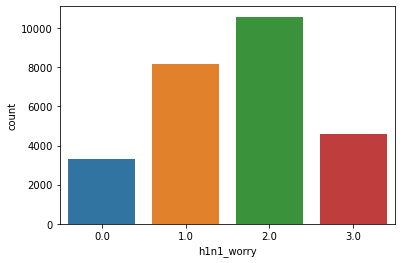

In [8]:
sns.countplot(x='h1n1_worry',data=df) # counting number of peoples worry about h1n1 vaccine

In [9]:
# h1n1_worry= Worry about the h1n1 flu(0,1,2,3) 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried
# somewhat worried peoples are more
# not worried peoples are very less

In [10]:
df.isnull().sum() # printing the null values

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [11]:
# there are lot of null values in data set lets treat null values by replacing with mode

In [16]:
mode = df.filter(df.columns).mode()
cols=df.columns
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [17]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [18]:
##modeFiller = lambda x: x.fillna(x.mode())
##df = df.apply(modeFiller,axis=1)

In [19]:
df['age_bracket'] # reading the age_bracket column


0        55 - 64 Years
1        35 - 44 Years
2        18 - 34 Years
3            65+ Years
4        45 - 54 Years
             ...      
26702        65+ Years
26703    18 - 34 Years
26704    55 - 64 Years
26705    18 - 34 Years
26706        65+ Years
Name: age_bracket, Length: 26707, dtype: object

<AxesSubplot:xlabel='age_bracket', ylabel='count'>

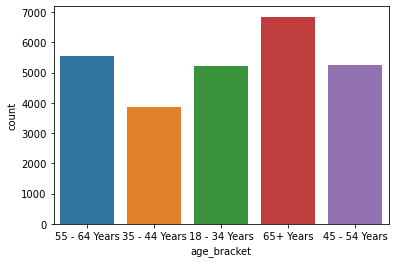

In [20]:
sns.countplot(x='age_bracket',data=df)


<AxesSubplot:>

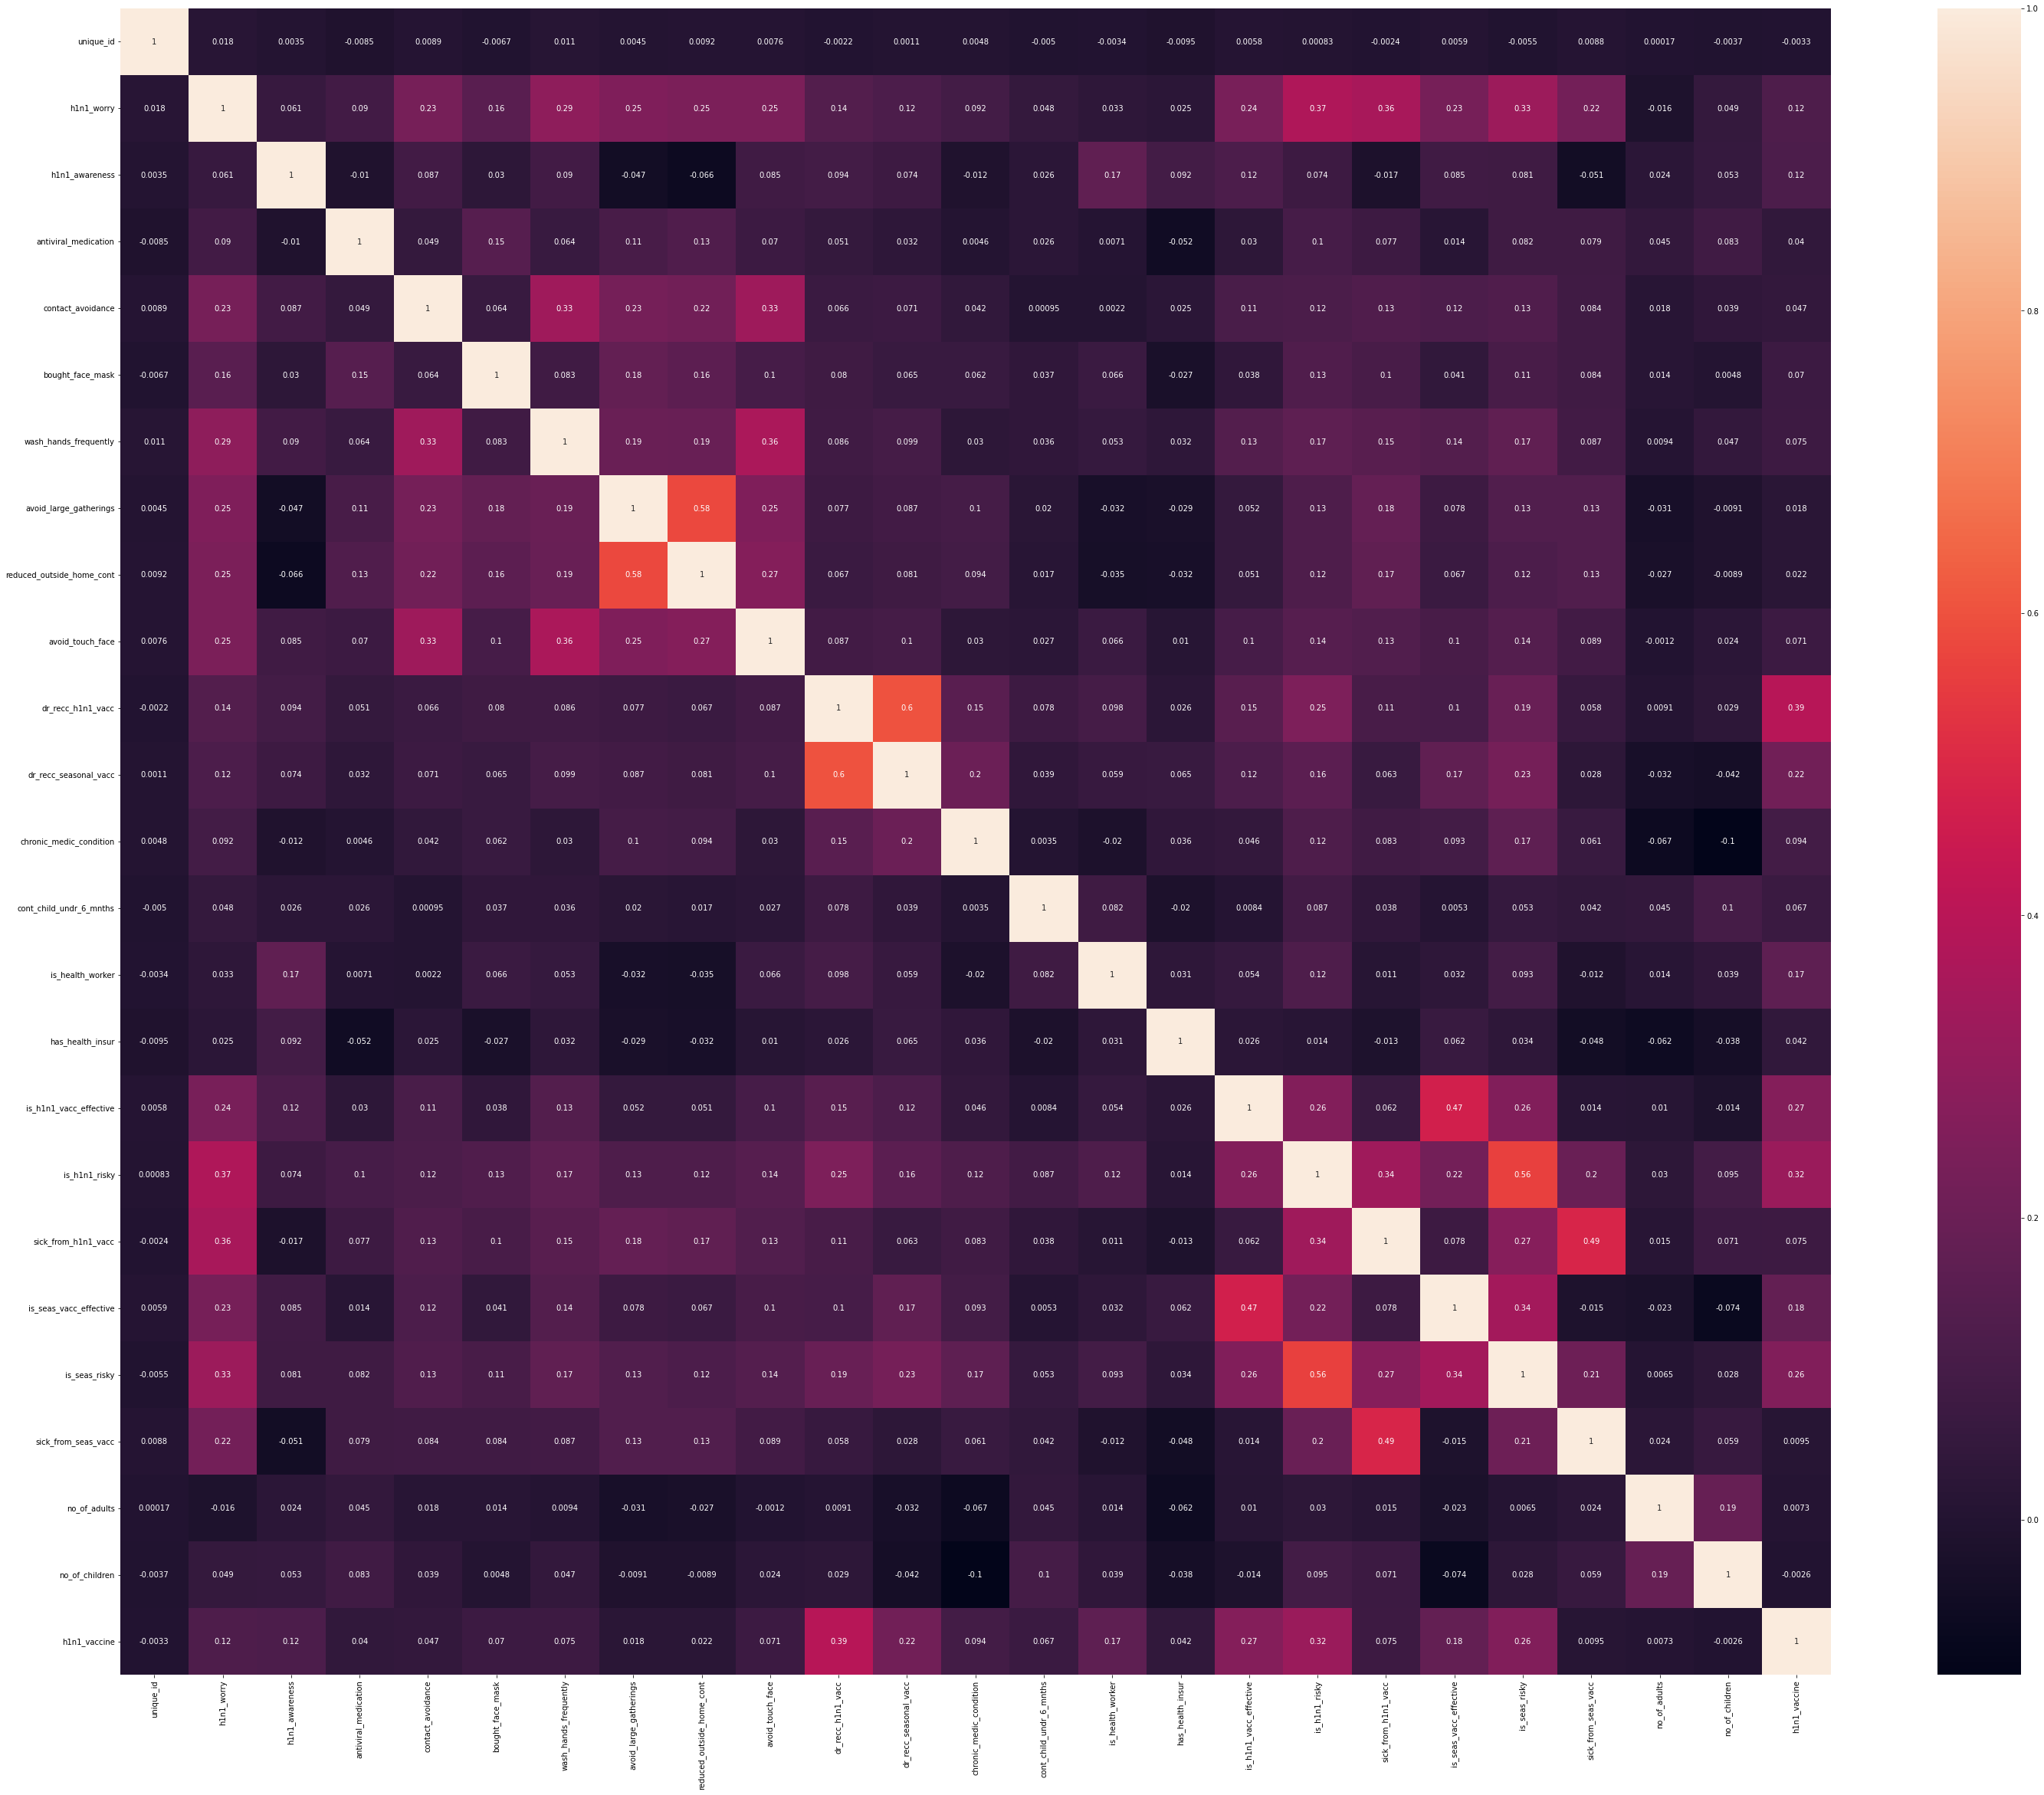

In [21]:
plt.figure(figsize=(50,40))
sns.heatmap(df.corr(),annot=True)  # finding the correlation by using heat map

In [22]:
# we are encoding all the object columns

In [23]:
df = pd.get_dummies(df, columns=['age_bracket','qualification','race','sex','income_level','marital_status','employment','census_msa'])

In [24]:
df=pd.get_dummies(df,columns=['housing_status'])

In [25]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,marital_status_Married,marital_status_Not Married,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,housing_status_Own,housing_status_Rent
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,1,0,0,0,1,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,1,0,0,1,0,0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,1,0,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,1,0,0,1,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,1,0,0,1,0,0,1,0


In [26]:
#Model

In [27]:
#Training Data and Testing Data Split

In [28]:
X = df.drop(['h1n1_vaccine'], axis=1)
y = df[['h1n1_vaccine']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [30]:
#Fit the Model


In [31]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\dell\sarvari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\sarvari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions=model.predict(X_test)

In [33]:
model.score(X_train,y_train)

0.8271637958703327

In [34]:
model.score(X_test,y_test)

0.8206664170722576

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8206664170722576

In [36]:
## with out any scaling techniques the traing score is 0.8271637958703327 , testing score is 0.8206664170722576

In [37]:
#StandardScaler

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [39]:
from sklearn.preprocessing import a
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ImportError: cannot import name 'a' from 'sklearn.preprocessing' (C:\Users\dell\sarvari\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)


In [ ]:
predictions=model.predict(X_test)

In [ ]:
model.score(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
accuracy_score(y_test,predictions)

In [ ]:
# by doing scaling our training score is 0.8376484433508078 testing score is 0.8307749906402097
# our model score is increased after applying scaling

In [ ]:
#lets do the model by replacing the null values with median

In [40]:
#median

In [41]:
df=pd.read_csv('h1n1_vaccine_prediction.csv')
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [42]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [43]:
median = df.filter(df.columns).median()
cols=df.columns
df[cols]=df[cols].fillna(df.median().iloc[0])

C:\Users\dell\AppData\Local\Temp\ipykernel_1444\847496433.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df.filter(df.columns).median()
C:\Users\dell\AppData\Local\Temp\ipykernel_1444\847496433.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[cols]=df[cols].fillna(df.median().iloc[0])


In [44]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [45]:
df = pd.get_dummies(df, columns=['age_bracket','qualification','race','sex','income_level','marital_status','employment','census_msa'])

In [46]:
df=pd.get_dummies(df,columns=['housing_status'])

In [47]:
#Model

In [48]:
X = df.drop(['h1n1_vaccine'], axis=1)
y = df[['h1n1_vaccine']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [50]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\dell\sarvari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\sarvari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
predictions=model.predict(X_test)

In [52]:
model.score(X_train,y_train)

0.7890767091045255

In [53]:
model.score(X_test,y_test)

0.7834768501185574

In [54]:
#StandardScaler

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\dell\sarvari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [58]:
predictions=model.predict(X_test)

In [59]:
model.score(X_train,y_train)

0.7891836953033059

In [60]:
model.score(X_test,y_test)

0.7837264445276426

In [61]:
#conclusion

In [62]:
 # the model is performing good when we replace null values with mode than median
 # In both cases the model is performing good after scaling 